<a href="https://colab.research.google.com/github/Jueunkim429/Cloud-cloud/blob/main/CutMix1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install opencv-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [64]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [124]:
import os
import numpy as np
import random
import cv2
import matplotlib.pyplot as plt

In [125]:
image_path = '/content/drive/MyDrive/cloud_data/'
index_len = len(os.listdir(image_path))
image_list = os.listdir(image_path)

def load_image(path, index):
    image = cv2.imread(os.path.join(path, image_list[index]), cv2.IMREAD_COLOR)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB).astype(np.float32)
    image /= 255.0

    return image

image = load_image(image_path, 10)
image_size = image.shape[0]

In [110]:
def cutmix(path, index, imsize):
    w, h = imsize, imsize # 이미지의 가로와 세로 크기를 설정
    s = imsize // 2

    # 랜덤하게 선택한 값을 xc와 yc로 지정. 잘라낼 영역의 중심 좌표를 나타낸다.
    xc, yc = [int(random.uniform(imsize * 0.25, imsize * 0.75)) for _ in range(2)]  # 256 ~ 768

    # index와 랜덤하게 선택한 인덱스 3개를 리스트 indexes에 저장. 잘라낼 영역에 사용할 이미지의 인덱스.
    indexes = [index] + [random.randint(0, index) for _ in range(3)]
    
    # result_img를 크기 (imsize, imsize, 3)로 생성. 이는 결과 이미지를 저장할 배열. 초기값은 1로 설정
    result_img = np.full((imsize, imsize, 3),1, dtype=np.float32)

    # indexes에 저장된 각 인덱스에 대해 반복
    for i, index in enumerate(indexes):
        image = load_image(path, index) # 인덱스에 대응하는 이미지 로

        # 잘라낼 영역의 위치와 크기를 설정. i 값에 따라서 이미지를 잘라낼 위치를 결정
        if i == 0:  # top left
            x1a, y1a, x2a, y2a = max(xc - w, 0), max(yc - h, 0), xc, yc
            x1b, y1b, x2b, y2b = w - (x2a - x1a), h - (y2a - y1a), w, h
        elif i == 1:  # top right
            x1a, y1a, x2a, y2a = xc, max(yc - h, 0), min(xc + w, s * 2), yc
            x1b, y1b, x2b, y2b = 0, h - (y2a - y1a), min(w, x2a - x1a), h
        elif i == 2:  # bottom left
            x1a, y1a, x2a, y2a = max(xc - w, 0), yc, xc, min(s * 2, yc + h)
            x1b, y1b, x2b, y2b = w - (x2a - x1a), 0, max(xc, w), min(y2a - y1a, h)
        elif i == 3:  # bottom right
            x1a, y1a, x2a, y2a = xc, yc, min(xc + w, s * 2), min(s * 2, yc + h)
            x1b, y1b, x2b, y2b = 0, 0, min(w, x2a - x1a), min(y2a - y1a, h)

        # 잘라낸 조각이 결과 이미지에 덮어씌워질 범위에 대해 조건문을 사용하여 크기가 0이 아닌 경우에만 조각을 덮어씌우기.
        if x2a - x1a > 0 and y2a - y1a > 0:  # 조각의 크기가 0이 아닌 경우에만 조각 내기 수행
            piece = cv2.resize(image[y1b:y2b, x1b:x2b], (x2a - x1a, y2a - y1a))
            result_img[y1a:y2a, x1a:x2a] = piece

    return result_img


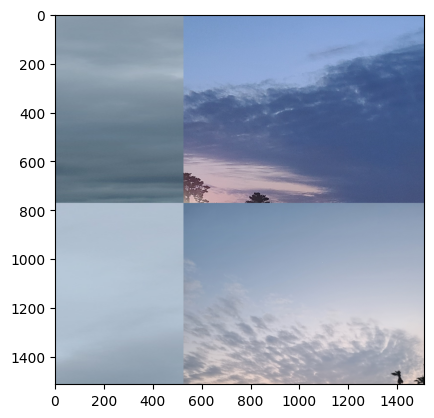

In [111]:
test = cutmix(image_path, 10, image_size)
plt.imshow(test)
plt.show()

In [155]:
def cutmix2(path, index, imsize):
    w, h = imsize, imsize # 이미지의 가로와 세로 크기를 설정
    s = imsize // 2

    # 랜덤하게 선택한 값을 xc와 yc로 지정. 잘라낼 영역의 중심 좌표를 나타낸다.
    xc, yc = [int(random.uniform(imsize * 0.25, imsize * 0.75)) for _ in range(2)]  # 256 ~ 768

    # index와 랜덤하게 선택한 인덱스 1개를 리스트 indexes에 저장. 잘라낼 영역에 사용할 이미지의 인덱스.
    indexes = [index] + [random.randint(0, index) for _ in range(1)]

    # result_img를 크기 (imsize, imsize, 3)로 생성. 이는 결과 이미지를 저장할 배열. 초기값은 1로 설정
    result_img = np.full((imsize, imsize, 3),1, dtype=np.float32)

    # indexes에 저장된 각 인덱스에 대해 반복
    for i, index in enumerate(indexes):
        image = load_image(path, index) # 인덱스에 대응하는 이미지 로

        # 잘라낼 영역의 위치와 크기를 설정. i 값에 따라서 이미지를 잘라낼 위치를 결정
        if i == 0:  # top left
            x1a, y1a, x2a, y2a = max(xc - w, 0), max(yc - h, 0), xc, h # y2a 변경
            x1b, y1b, x2b, y2b = w - (x2a - x1a), h - (y2a - y1a), w, h
        elif i == 1:  # top right
            x1a, y1a, x2a, y2a = xc, max(yc - h, 0), min(xc + w, s * 2), h # y2a 변경
            x1b, y1b, x2b, y2b = 0, h - (y2a - y1a), min(w, x2a - x1a), h
        

        # 잘라낸 조각이 결과 이미지에 덮어씌워질 범위에 대해 조건문을 사용하여 크기가 0이 아닌 경우에만 조각을 덮어씌우기.
        if x2a - x1a > 0 and y2a - y1a > 0:  # 조각의 크기가 0이 아닌 경우에만 조각 내기 수행
            piece = cv2.resize(image[y1b:y2b, x1b:x2b], (x2a - x1a, y2a - y1a))
            result_img[y1a:y2a, x1a:x2a] = piece

    return result_img

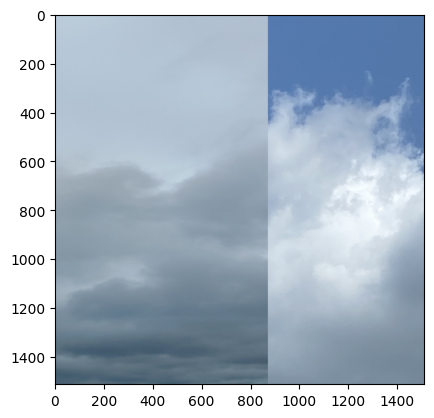

In [159]:
test = cutmix2(image_path, 10, image_size)
plt.imshow(test)
plt.show()

In [169]:
def cutmix3(path, index, imsize):
    w, h = imsize, imsize # 이미지의 가로와 세로 크기를 설정
    s = imsize // 2

    # 랜덤하게 선택한 값을 xc와 yc로 지정. 잘라낼 영역의 중심 좌표를 나타낸다.
    xc, yc = [int(random.uniform(imsize * 0.25, imsize * 0.75)) for _ in range(2)]  # 256 ~ 768

    # index와 랜덤하게 선택한 인덱스 1개를 리스트 indexes에 저장. 잘라낼 영역에 사용할 이미지의 인덱스.
    indexes = [index] + [random.randint(0, index) for _ in range(1)]

    # result_img를 크기 (imsize, imsize, 3)로 생성. 이는 결과 이미지를 저장할 배열. 초기값은 1로 설정
    result_img = np.full((imsize, imsize, 3),1, dtype=np.float32)

    # indexes에 저장된 각 인덱스에 대해 반복
    for i, index in enumerate(indexes):
        image = load_image(path, index) # 인덱스에 대응하는 이미지 로

        # 잘라낼 영역의 위치와 크기를 설정. i 값에 따라서 이미지를 잘라낼 위치를 결정
        if i == 0:  # top left
            x1a, y1a, x2a, y2a = max(xc - w, 0), max(yc - h, 0), w, yc # x2a 변경
            x1b, y1b, x2b, y2b = w - (x2a - x1a), h - (y2a - y1a), w, h
        elif i == 1:  # bottom left
            x1a, y1a, x2a, y2a = max(xc - w, 0), yc, w, min(s * 2, yc + h) # x2a 변경
            x1b, y1b, x2b, y2b = w - (x2a - x1a), 0, max(xc, w), min(y2a - y1a, h)
        

        # 잘라낸 조각이 결과 이미지에 덮어씌워질 범위에 대해 조건문을 사용하여 크기가 0이 아닌 경우에만 조각을 덮어씌우기.
        if x2a - x1a > 0 and y2a - y1a > 0:  # 조각의 크기가 0이 아닌 경우에만 조각 내기 수행
            piece = cv2.resize(image[y1b:y2b, x1b:x2b], (x2a - x1a, y2a - y1a))
            result_img[y1a:y2a, x1a:x2a] = piece

    return result_img

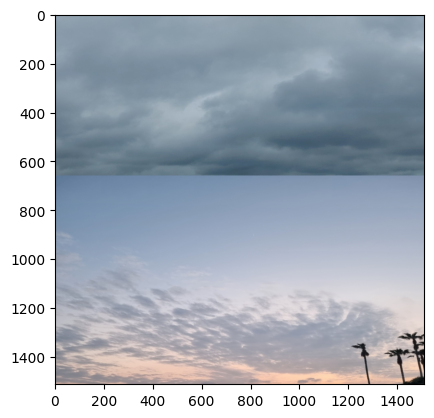

In [171]:
test = cutmix3(image_path, 10, image_size)
plt.imshow(test)
plt.show()